In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [5]:
df_model = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_model.csv')

In [6]:
df_model.head()

,year_edition,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank
0,2014,2,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,114.0
1,2014,3,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,112.0
2,2014,4,1.79,68.0,659,2028,264,1,939,476,33,21.222808,111.0
3,2014,5,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,18.0
4,2014,6,1.85,73.0,392,602,926,0,126,25,35,21.329438,113.0


In [7]:
df_model.dtypes

year_edition                  int64
bib_number                    int64
height                      float64
weight                      float64
speciality_one_day_races      int64
speciality_gc                 int64
speciality_time_trial         int64
speciality_sprint             int64
speciality_climber            int64
speciality_hills              int64
age                           int64
bmi                         float64
rank                        float64
dtype: object

In [8]:
# Clean code to test df_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define your feature sets
feature_sets = {
    'full': [
        'year_edition', 'bib_number', 'height', 'weight',
        'speciality_one_day_races', 'speciality_gc',
        'speciality_time_trial', 'speciality_sprint',
        'speciality_climber', 'speciality_hills', 'age', 'bmi'
    ],
    'reduced_1': [
        'year_edition', 'bib_number', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial',
        'speciality_climber', 'speciality_hills', 'age', 'bmi'
    ],
    'reduced_2': [
        'year_edition', 'bib_number', 'speciality_gc',
        'speciality_climber', 'age', 'bmi'
    ]
}

# Define models to test
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Collect results
results = []

for set_name, features in feature_sets.items():
    X = df_model[features]
    y = df_model['rank']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Preprocessing
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), features)
    ])
    
    for model_name, model in models.items():
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'feature_set': set_name,
            'model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })

# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df)


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

  feature_set             model        MAE       RMSE        R2
8   reduced_2  GradientBoosting  22.049014  28.449991  0.599684
5   reduced_1  GradientBoosting  21.964057  28.496896  0.598363
2        full  GradientBoosting  22.356636  28.859488  0.588078
7   reduced_2      RandomForest  21.902156  28.999764  0.584063
1        full      RandomForest  22.236950  29.542595  0.568346
4   reduced_1      RandomForest  22.513694  29.893092  0.558043
0        full  LinearRegression  25.942163  31.105122  0.521478
3   reduced_1  LinearRegression  26.555670  31.702065  0.502935
6   reduced_2  LinearRegression  26.678985  31.974977  0.494340


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


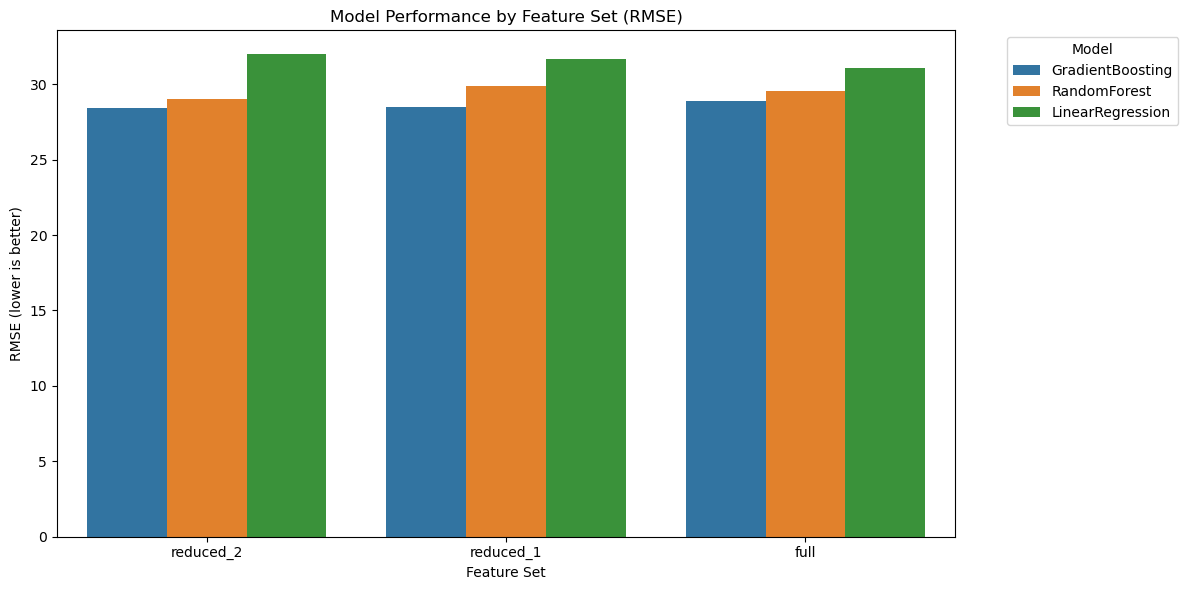

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='feature_set', y='RMSE', hue='model')
plt.title('Model Performance by Feature Set (RMSE)')
plt.ylabel('RMSE (lower is better)')
plt.xlabel('Feature Set')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1967
[LightGBM] [Info] Number of data points in the train set: 1125, number of used features: 12
[LightGBM] [Info] Start training from score 73.245333
Model LightGBM failed on feature set reduced_1: X has 9 features, but LGBMRegressor is expecting 12 features as input.
Model LightGBM failed on feature set reduced_2: X has 6 features, but LGBMRegressor is expecting 12 features as input.
   feature_set             model        MAE       RMSE        R2
11   reduced_2  GradientBoosting  22.049014  28.449991  0.599684
7    reduced_1  GradientBoosting  21.964057  28.496896  0.598363
2         full  GradientBoosting  22.356636  28.859488  0.588078
10   reduced_2      RandomForest  21.902156  28.999764  0.584063
1         full      RandomForest  22.236950  29.542595  0.568346
4         full          LightG

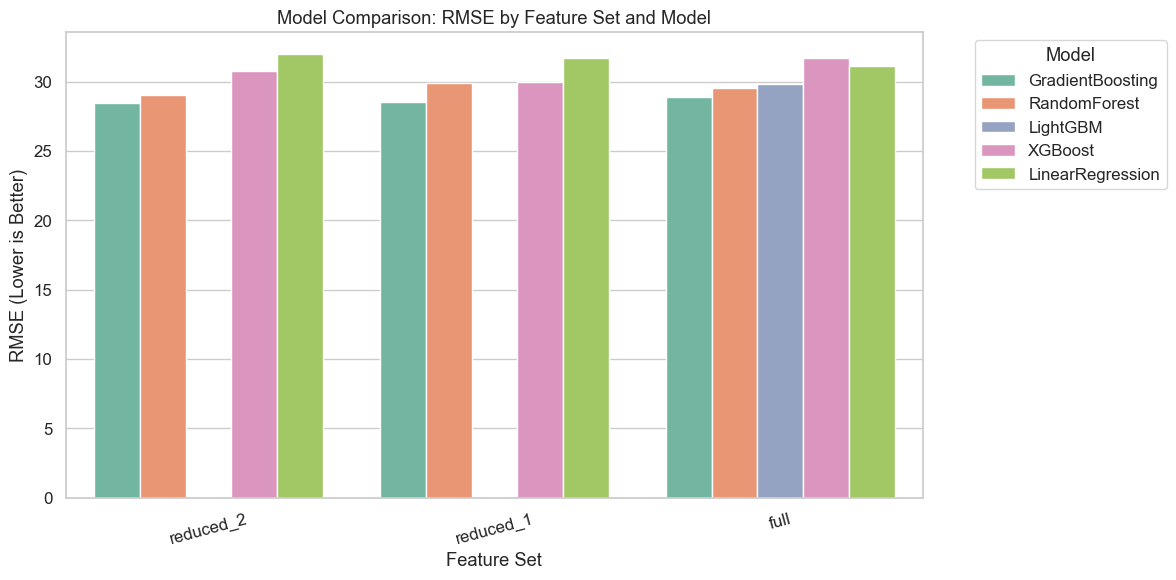

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.metrics._regression")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Optional imports (requires installation)
try:
    from xgboost import XGBRegressor
    xgb_installed = True
except ImportError:
    xgb_installed = False

try:
    from lightgbm import LGBMRegressor
    lgb_installed = True
except ImportError:
    lgb_installed = False

# Feature sets
feature_sets = {
    'full': [
        'year_edition', 'bib_number', 'height', 'weight', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_sprint',
        'speciality_climber', 'speciality_hills', 'age', 'bmi'
    ],
    'reduced_1': [
        'year_edition', 'bib_number', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_climber',
        'speciality_hills', 'age', 'bmi'
    ],
    'reduced_2': [
        'year_edition', 'bib_number', 'speciality_gc', 'speciality_climber', 'age', 'bmi'
    ]
}

# Models
model_dict = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
if xgb_installed:
    model_dict['XGBoost'] = XGBRegressor(n_estimators=100, random_state=42)
if lgb_installed:
    model_dict['LightGBM'] = LGBMRegressor(n_estimators=100, random_state=42)

results_list = []

# Loop over feature sets and models
for fs_name, features in feature_sets.items():
    categorical_features = [f for f in features if df_model[f].dtype == 'object']
    numeric_features = [f for f in features if f not in categorical_features]

    X = df_model[features]
    y = df_model['rank']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    for model_name, model in model_dict.items():
        try:
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('regressor', model)
            ])

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            results_list.append({
                'feature_set': fs_name,
                'model': model_name,
                'MAE': mean_absolute_error(y_test, y_pred),
                'RMSE': root_mean_squared_error(y_test, y_pred),
                'R2': r2_score(y_test, y_pred)
            })
        except ValueError as e:
            print(f"Model {model_name} failed on feature set {fs_name}: {e}")

# Results DataFrame
results_df = pd.DataFrame(results_list).sort_values(by='RMSE')
print(results_df)

# Plot
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='feature_set', y='RMSE', hue='model', palette='Set2')
plt.title('Model Comparison: RMSE by Feature Set and Model')
plt.ylabel('RMSE (Lower is Better)')
plt.xlabel('Feature Set')
plt.xticks(rotation=15)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1967
[LightGBM] [Info] Number of data points in the train set: 1125, number of used features: 12
[LightGBM] [Info] Start training from score 73.245333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1718
[LightGBM] [Info] Number of data points in the train set: 1125, number of used features: 9
[LightGBM] [Info] Start training from score 73.245333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 1125, number of used features: 6
[LightGBM] [Info] Start trainin

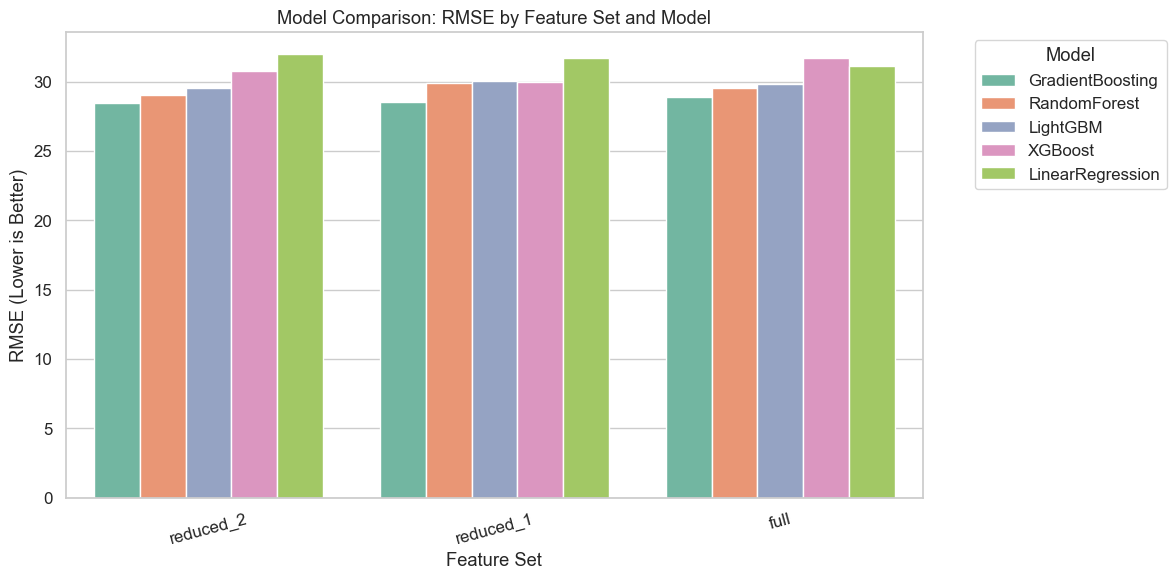

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.metrics._regression")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Optional imports (requires installation)
try:
    from xgboost import XGBRegressor
    xgb_installed = True
except ImportError:
    xgb_installed = False

try:
    from lightgbm import LGBMRegressor
    lgb_installed = True
except ImportError:
    lgb_installed = False

# Feature sets
feature_sets = {
    'full': [
        'year_edition', 'bib_number', 'height', 'weight', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_sprint',
        'speciality_climber', 'speciality_hills', 'age', 'bmi'
    ],
    'reduced_1': [
        'year_edition', 'bib_number', 'speciality_one_day_races',
        'speciality_gc', 'speciality_time_trial', 'speciality_climber',
        'speciality_hills', 'age', 'bmi'
    ],
    'reduced_2': [
        'year_edition', 'bib_number', 'speciality_gc', 'speciality_climber', 'age', 'bmi'
    ]
}

results_list = []

# Loop over feature sets and models
for fs_name, features in feature_sets.items():
    categorical_features = [f for f in features if df_model[f].dtype == 'object']
    numeric_features = [f for f in features if f not in categorical_features]

    X = df_model[features]
    y = df_model['rank']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    model_names = ['LinearRegression', 'RandomForest', 'GradientBoosting']
    if xgb_installed:
        model_names.append('XGBoost')
    if lgb_installed:
        model_names.append('LightGBM')

    for model_name in model_names:
        # Instantiate model freshly each time
        if model_name == 'LinearRegression':
            model = LinearRegression()
        elif model_name == 'RandomForest':
            model = RandomForestRegressor(n_estimators=100, random_state=42)
        elif model_name == 'GradientBoosting':
            model = GradientBoostingRegressor(n_estimators=100, random_state=42)
        elif model_name == 'XGBoost':
            model = XGBRegressor(n_estimators=100, random_state=42)
        elif model_name == 'LightGBM':
            model = LGBMRegressor(n_estimators=100, random_state=42)

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        try:
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            results_list.append({
                'feature_set': fs_name,
                'model': model_name,
                'MAE': mean_absolute_error(y_test, y_pred),
                'RMSE': root_mean_squared_error(y_test, y_pred),
                'R2': r2_score(y_test, y_pred)
            })
        except ValueError as e:
            print(f"Model {model_name} failed on feature set {fs_name}: {e}")

# Results DataFrame
results_df = pd.DataFrame(results_list).sort_values(by='RMSE')
print(results_df)

# Plot
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='feature_set', y='RMSE', hue='model', palette='Set2')
plt.title('Model Comparison: RMSE by Feature Set and Model')
plt.ylabel('RMSE (Lower is Better)')
plt.xlabel('Feature Set')
plt.xticks(rotation=15)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
# Load 2025 Tour de France participants data
df_2025 = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\notebooks\tdf_2025_startlist_full_details.csv')
# Display the first few rows of the dataframe
df_2025.head()

,name,rider_url,team,team_url,bib_number,nationality,birthdate,place_of_birth,height,weight,pcs_rank,uci_world_rank,one_day_races,gc,time_trial,sprint,climber,hills
0,CARAPAZ Richard,richard-carapaz,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,EC,1993-5-29,El Carmelo,1.70,62.0,NaN,NaN,1262,4060,551,88,4822,1735
1,SWEENY Harry,harry-sweeny,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,AU,1998-7-9,Warwick,1.86,75.0,NaN,NaN,177,228,159,63,107,251
2,POWLESS Neilson,neilson-powless,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,US,1996-9-3,Eglin,1.83,67.0,NaN,NaN,2607,1569,891,238,1678,1109
3,HEALY Ben,ben-healy,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,IE,2000-9-11,Kingswinford,1.75,65.0,NaN,NaN,1284,504,470,40,957,480
4,POGAČAR Tadej,tadej-pogacar,UAE Team Emirates - XRG (WT),team/uae-team-emirates-xrg-2025,NaN,SI,1998-9-21,Klanec,1.76,66.0,NaN,NaN,7677,6844,2703,194,8498,3706


In [16]:
# For df_2025 add the year_edition column
df_2025['year_edition'] = 2025

In [17]:
# Calculate the age of each rider in 2025
from datetime import datetime
df_2025['age'] = 2025 - pd.to_datetime(df_2025['birthdate']).dt.year

In [18]:
# Calculate BMI for each rider in 2025
df_2025['bmi'] = df_2025['weight'] / (df_2025['height'] ** 2)

In [19]:
# Set a temporary placeholder for bib_number
median_bib = df_model['bib_number'].median()
df_2025['bib_number'] = median_bib


In [20]:
# Drop unnecessary columns
df_2025 = df_2025.drop(columns=['nationality', 'birthdate', 'rider_url', 'team_url', 'birthdate', 'place_of_birth', 'pcs_rank', 'uci_world_rank'])

In [21]:
# Rename columns to match the model's expected input
df_2025 = df_2025.rename(columns={
    'one_day_races': 'speciality_one_day_races',
    'gc': 'speciality_gc',
    'time_trial': 'speciality_time_trial',
    'sprint': 'speciality_sprint',
    'climber': 'speciality_climber',
    'hills': 'speciality_hills'
})

In [22]:
df_2025.head()

,name,team,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,year_edition,age,bmi
0,CARAPAZ Richard,EF Education - EasyPost (WT),107.0,1.70,62.0,1262,4060,551,88,4822,1735,2025,32,21.453287
1,SWEENY Harry,EF Education - EasyPost (WT),107.0,1.86,75.0,177,228,159,63,107,251,2025,27,21.678807
2,POWLESS Neilson,EF Education - EasyPost (WT),107.0,1.83,67.0,2607,1569,891,238,1678,1109,2025,29,20.006569
3,HEALY Ben,EF Education - EasyPost (WT),107.0,1.75,65.0,1284,504,470,40,957,480,2025,25,21.224490
4,POGAČAR Tadej,UAE Team Emirates - XRG (WT),107.0,1.76,66.0,7677,6844,2703,194,8498,3706,2025,27,21.306818


In [23]:
# Save the cleaned 2025 data to a CSV file
df_2025.to_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_2025_participants_cleaned.csv', index=False) 

In [24]:
df_2025.head()

,name,team,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,year_edition,age,bmi
0,CARAPAZ Richard,EF Education - EasyPost (WT),107.0,1.70,62.0,1262,4060,551,88,4822,1735,2025,32,21.453287
1,SWEENY Harry,EF Education - EasyPost (WT),107.0,1.86,75.0,177,228,159,63,107,251,2025,27,21.678807
2,POWLESS Neilson,EF Education - EasyPost (WT),107.0,1.83,67.0,2607,1569,891,238,1678,1109,2025,29,20.006569
3,HEALY Ben,EF Education - EasyPost (WT),107.0,1.75,65.0,1284,504,470,40,957,480,2025,25,21.224490
4,POGAČAR Tadej,UAE Team Emirates - XRG (WT),107.0,1.76,66.0,7677,6844,2703,194,8498,3706,2025,27,21.306818


In [26]:
# Check missing values in the 2025 dataset
print(df_2025[best_features].isna().sum())


year_edition                0
bib_number                  0
speciality_one_day_races    0
speciality_gc               0
speciality_time_trial       0
speciality_climber          0
speciality_hills            0
age                         0
bmi                         1
dtype: int64


In [27]:
# Fill missing BMI values with the median BMI from the training data
median_bmi = df_model['bmi'].median()
df_2025['bmi'].fillna(median_bmi, inplace=True)


C:\Users\raclo\AppData\Local\Temp\ipykernel_17268\2781815999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2025['bmi'].fillna(median_bmi, inplace=True)


In [28]:
# Assuming your best model uses the 'full' feature set
best_features = [
    'year_edition', 'bib_number', 'height', 'weight', 'speciality_one_day_races',
    'speciality_gc', 'speciality_time_trial', 'speciality_sprint',
    'speciality_climber', 'speciality_hills', 'age', 'bmi'
]

# Extract features from df_2025
X_2025 = df_2025[best_features]

# Predict using your trained pipeline (replace 'pipeline' with your actual pipeline variable)
df_2025['predicted_rank'] = pipeline.predict(X_2025)

# Check predictions
print(df_2025[['name', 'predicted_rank']])


                           name  predicted_rank
0               CARAPAZ Richard       18.991391
1                  SWEENY Harry      124.696692
2               POWLESS Neilson       49.106816
3                     HEALY Ben       77.550575
4                 POGAČAR Tadej        5.973781
..                          ...             ...
112  JOHANNESSEN Tobias Halland       52.357719
113  JOHANNESSEN Anders Halland       99.501326
114            ABRAHAMSEN Jonas      121.995174
115            HOELGAARD Markus      117.442480
116              FREDHEIM Stian      136.233861

[117 rows x 2 columns]


In [31]:
# Add rounded predicted rank column
df_2025['predicted_rank_rounded'] = df_2025['predicted_rank'].round().astype(int)

# Sort ascending by predicted rank (best predicted finishers first)
df_sorted = df_2025.sort_values(by='predicted_rank_rounded', ascending=True)

# Show name and predicted rank
print(df_sorted[['name', 'predicted_rank_rounded']])



                 name  predicted_rank_rounded
20    EVENEPOEL Remco                      -2
4       POGAČAR Tadej                       6
41   VINGEGAARD Jonas                       9
5        ALMEIDA João                      10
68        GAUDU David                      13
..                ...                     ...
116    FREDHEIM Stian                     136
56        REX Laurenz                     137
88     REINDERS Elmar                     138
63      THEUNS Edward                     141
21        MERLIER Tim                     142

[117 rows x 2 columns]


In [32]:
# Add a clip step to force all predicted ranks to be at least 1
# Clip predicted ranks so that minimum rank is 1
df_2025['predicted_rank_clipped'] = df_2025['predicted_rank'].clip(lower=1)

# Round the clipped predicted rank and convert to int
df_2025['predicted_rank_rounded'] = df_2025['predicted_rank_clipped'].round().astype(int)

# Sort ascending
df_sorted = df_2025.sort_values(by='predicted_rank_rounded', ascending=True)

print(df_sorted[['name', 'predicted_rank_rounded']])


                 name  predicted_rank_rounded
20    EVENEPOEL Remco                       1
4       POGAČAR Tadej                       6
41   VINGEGAARD Jonas                       9
5        ALMEIDA João                      10
68        GAUDU David                      13
..                ...                     ...
116    FREDHEIM Stian                     136
56        REX Laurenz                     137
88     REINDERS Elmar                     138
63      THEUNS Edward                     141
21        MERLIER Tim                     142

[117 rows x 2 columns]


In [33]:
# Assign strict sequential ranks to the predicted ranks
# Sort dataframe by predicted rank ascending (best first)
df_sorted = df_2025.sort_values(by='predicted_rank').reset_index(drop=True)

# Assign clean ranks starting at 1 in order
df_sorted['predicted_position'] = df_sorted.index + 1

# Select relevant columns to view
print(df_sorted[['name', 'predicted_rank', 'predicted_position']])


                 name  predicted_rank  predicted_position
0     EVENEPOEL Remco       -2.022124                   1
1       POGAČAR Tadej        5.973781                   2
2    VINGEGAARD Jonas        9.220302                   3
3        ALMEIDA João       10.439350                   4
4         GAUDU David       12.625701                   5
..                ...             ...                 ...
112    FREDHEIM Stian      136.233861                 113
113       REX Laurenz      137.289974                 114
114    REINDERS Elmar      137.818362                 115
115     THEUNS Edward      141.359238                 116
116       MERLIER Tim      142.078979                 117

[117 rows x 3 columns]


In [34]:
df_sorted.head(10)

,name,team,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,year_edition,age,bmi,predicted_rank,predicted_rank_rounded,predicted_rank_clipped,predicted_position
0,EVENEPOEL Remco,Soudal Quick-Step (WT),107.0,1.71,61.0,3370,4254,4131,120,4068,1544,2025,25,20.861120,-2.022124,1,1.000000,1
1,POGAČAR Tadej,UAE Team Emirates - XRG (WT),107.0,1.76,66.0,7677,6844,2703,194,8498,3706,2025,27,21.306818,5.973781,6,5.973781,2
2,VINGEGAARD Jonas,Team Visma | Lease a Bike (WT),107.0,1.75,58.0,320,5026,2064,34,4390,1561,2025,29,18.938776,9.220302,9,9.220302,3
3,ALMEIDA João,UAE Team Emirates - XRG (WT),107.0,1.78,63.0,431,4704,2644,47,4249,1294,2025,27,19.883853,10.439350,10,10.439350,4
4,GAUDU David,Groupama - FDJ (WT),107.0,1.72,53.0,1762,3136,160,17,4052,1214,2025,29,17.915089,12.625701,13,12.625701,5
5,MAS Enric,Movistar Team (WT),107.0,1.77,61.0,993,4995,666,19,5690,1364,2025,30,19.470778,12.775847,13,12.775847,6
6,YATES Adam,UAE Team Emirates - XRG (WT),107.0,1.73,58.0,2349,7079,1216,64,7222,2004,2025,33,19.379197,14.248638,14,14.248638,7
7,VLASOV Aleksandr,Red Bull - BORA - hansgrohe (WT),107.0,1.86,68.0,1438,3649,1094,96,4040,1438,2025,29,19.655451,15.308730,15,15.308730,8
8,THOMAS Geraint,INEOS Grenadiers (WT),107.0,1.83,71.0,1277,6411,5423,306,4205,2692,2025,39,21.200991,18.837058,19,18.837058,9
9,CARAPAZ Richard,EF Education - EasyPost (WT),107.0,1.70,62.0,1262,4060,551,88,4822,1735,2025,32,21.453287,18.991391,19,18.991391,10


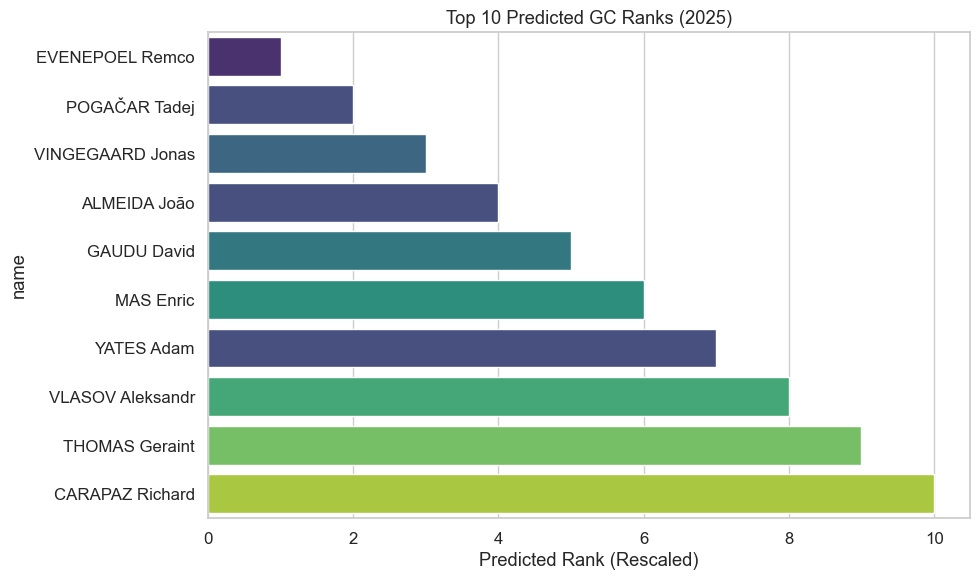

In [39]:
# Plot the top 10 predicted ranks
import seaborn as sns
plt.figure(figsize=(10, 6))
top10 = df_sorted.head(10)
sns.barplot(data=top10, x='predicted_position', y='name', hue='team', palette='viridis', legend=False)
plt.xlabel('Predicted Rank (Rescaled)')
plt.title('Top 10 Predicted GC Ranks (2025)')
plt.tight_layout()
plt.show()